In [4]:
# Load the data
import pandas as pd

mnist_df = pd.read_csv("mnist.csv")

In [5]:
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


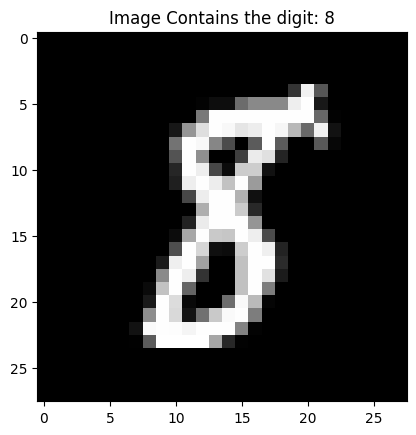

In [7]:
from matplotlib import pyplot as plt
img_index = 125
img = mnist_df.iloc[img_index,:-1].values.reshape(28,28).astype(float)
tgt = mnist_df['Target'][img_index]
plt.imshow(img)
plt.title("Image Contains the digit: "+str(tgt))
plt.gray()
plt.show()

In [8]:
# separate features and outcome
x = mnist_df.drop(columns="Target")
y = mnist_df['Target'].astype(int)

In [9]:
# Split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
# Build the model
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x_train,y_train)

#Evaluate the model
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Classification Report : Train")
print(classification_report(y_train,y_train_pred))
print("Classification Report : Test")
print(classification_report(y_test,y_test_pred))

D:\Miniconda\envs\eme\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Miniconda\envs\eme\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report : Train
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5189
           1       0.95      0.98      0.97      5900
           2       0.81      0.92      0.86      5229
           3       0.85      0.91      0.88      5335
           4       0.90      0.91      0.91      5237
           5       0.90      0.81      0.85      4706
           6       0.97      0.88      0.92      5115
           7       0.90      0.93      0.91      5415
           8       0.87      0.77      0.82      5168
           9       0.88      0.84      0.86      5206

    accuracy                           0.90     52500
   macro avg       0.90      0.89      0.89     52500
weighted avg       0.90      0.90      0.90     52500

Classification Report : Test
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1714
           1       0.93      0.98      0.96      1977
           2       

In [11]:
cm_train=pd.crosstab(y_train,y_train_pred)

In [12]:
import seaborn as sns

<Axes: xlabel='col_0', ylabel='Target'>

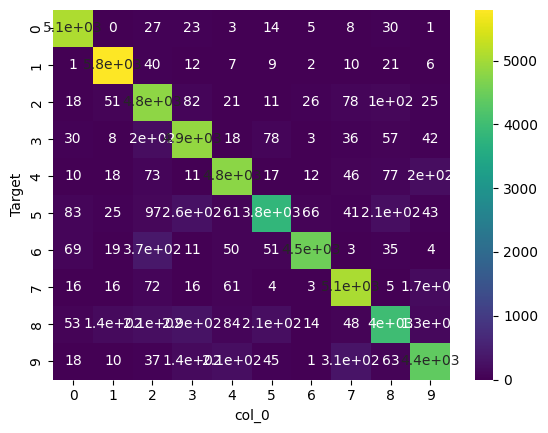

In [15]:
sns.heatmap(cm_train,cmap='viridis',annot=True)